**Step 1: Import Libraries**

replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
🎬 Top 5 movie recommendations for user 10:
title
Return of the Jedi (1983)          2.625570
Empire Strikes Back, The (1980)    2.382551
Back to the Future (1985)          2.135831
Schindler's List (1993)            2.132099
Fugitive, The (1993)               2.104110
dtype: float64


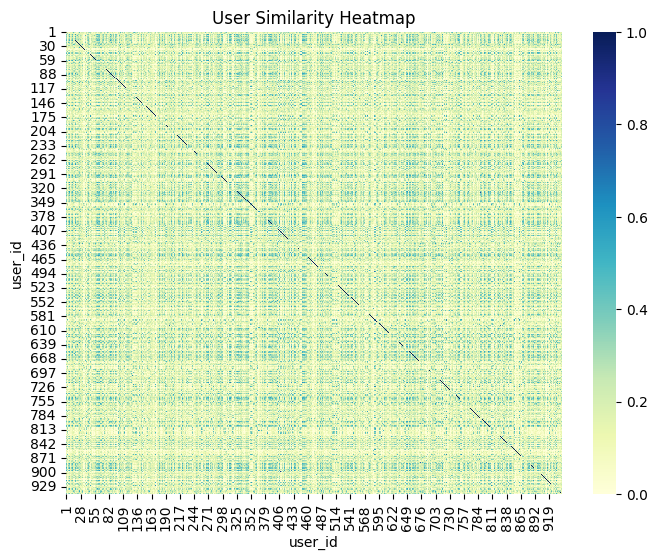

In [9]:
# ✅ Step 1: Setup – Download & unzip MovieLens 100K dataset
!wget -q http://files.grouplens.org/datasets/movielens/ml-100k.zip -O ml-100k.zip
!unzip -q ml-100k.zip

# ✅ Step 2: Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 3: Load ratings data
ratings = pd.read_csv('ml-100k/u.data', sep='\t',
                      names=['user_id', 'item_id', 'rating', 'timestamp'])
ratings.drop('timestamp', axis=1, inplace=True)

# ✅ Step 4: Load movie titles
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                     names=['item_id','title'], usecols=[0,1])
data = pd.merge(ratings, movies, on='item_id')

# ✅ Step 5: Create user-item matrix
user_movie = data.pivot_table(index='user_id', columns='title', values='rating')
user_movie.fillna(0, inplace=True)

# ✅ Step 6: Compute cosine similarity between users
sim_matrix = cosine_similarity(user_movie)
sim_df = pd.DataFrame(sim_matrix, index=user_movie.index, columns=user_movie.index)

# ✅ Step 7: Recommendation function (fixed for alignment)
def recommend(user_id, user_movie, sim_df, top_n=5):
    sim_scores = sim_df.loc[user_id]
    sim_scores = sim_scores.drop(user_id)  # remove self
    weighted_ratings = user_movie.drop(user_id).T.dot(sim_scores)
    similarity_sum = sim_scores.sum()
    weighted_avg = weighted_ratings / similarity_sum
    already_rated = user_movie.loc[user_id]
    recommendations = weighted_avg[already_rated == 0].sort_values(ascending=False).head(top_n)
    return recommendations

# ✅ Step 8: Generate recommendations for user 10
print("🎬 Top 5 movie recommendations for user 10:")
print(recommend(10, user_movie, sim_df, top_n=5))

# ✅ Step 9: Optional – Visualize user similarity matrix
plt.figure(figsize=(8,6))
sns.heatmap(sim_df, cmap="YlGnBu")
plt.title("User Similarity Heatmap")
plt.show()
